### 什么是回归问题？
* 用数字，预测数字。

In [3]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


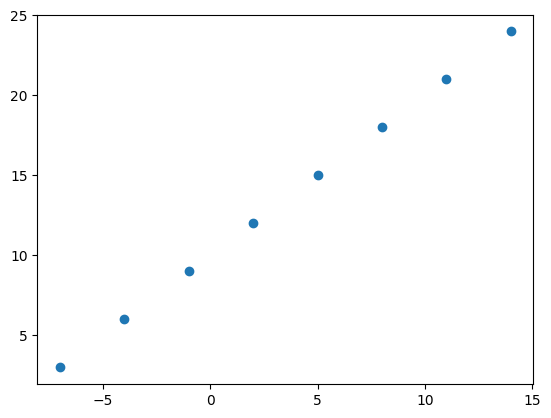

In [6]:
# create data and view and fit it
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [20]:
# input and output data shape
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y # y = X + 10

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

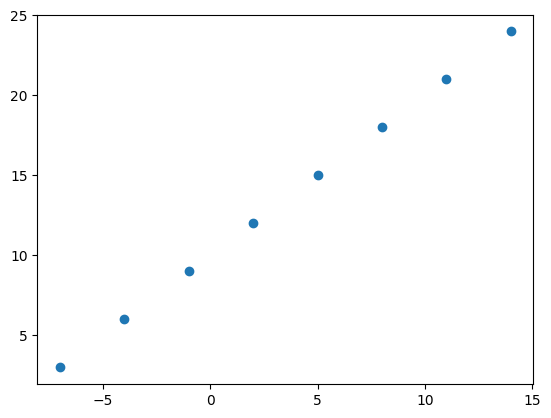

In [12]:
plt.scatter(X, y)

### Tensorflow的执行步骤
1. Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).
4. Evaluate a model - try to improve a model.

In [14]:
# set random seed
tf.random.set_seed(42)

# create a model using Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
# model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.legacy.SGD(),
             metrics=['mae'])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 134ms/step - loss: 9.4531 - mae: 9.4531
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.3206 - mae: 9.3206
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 9.1881 - mae: 9.1881
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 9.0556 - mae: 9.0556
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 8.9231 - mae: 8.9231


In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 142ms/step


array([[22.681358]], dtype=float32)

### 优化模型的方法
1. create阶段，增加隐藏层，改变激活函数
2. compile阶段，改变激励函数，改变学习率，改变优化函数
3. fit阶段，训练更多时间，增加epochs次数，或者增加数据量

In [18]:
# more epochs
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 134ms/step - loss: 9.8067 - mae: 9.8067
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6742 - mae: 9.6742
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 9.5417 - mae: 9.5417
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4092 - mae: 9.4092
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2767 - mae: 9.2767
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1442 - mae: 9.1442
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.0117 - mae: 9.0117
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8792 - mae: 8.8792
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7467 - mae: 8.7467
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.6142 - mae: 8.6142
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 8.481

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 39ms/step


array([[30.041252]], dtype=float32)

In [32]:
# bigger model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 170ms/step - loss: 15.1033 - mae: 15.1033
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.3168 - mae: 14.3168
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5445 - mae: 13.5445
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7974 - mae: 12.7974
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2761 - mae: 12.2761
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7540 - mae: 11.7540
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2327 - mae: 11.2327
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7034 - mae: 10.7034
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1644 - mae: 10.1644
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6148 - mae: 9.6148
Epoch 11/100
1/1 [==============================] - 0s 2ms

In [33]:
model.predict([17.0])

1/1 [==============================] - 0s 42ms/step


array([[27.56697]], dtype=float32)

### 模型评估
整个过程其实就是不断的评估和训练的循环。

In [34]:
# make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

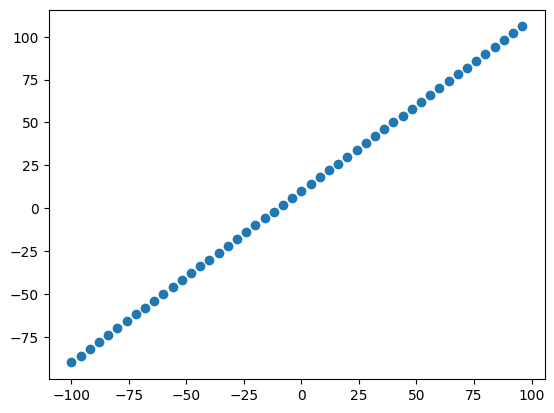

In [38]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y);

### 数据分割
* 训练
* 评估
* 测试

In [39]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

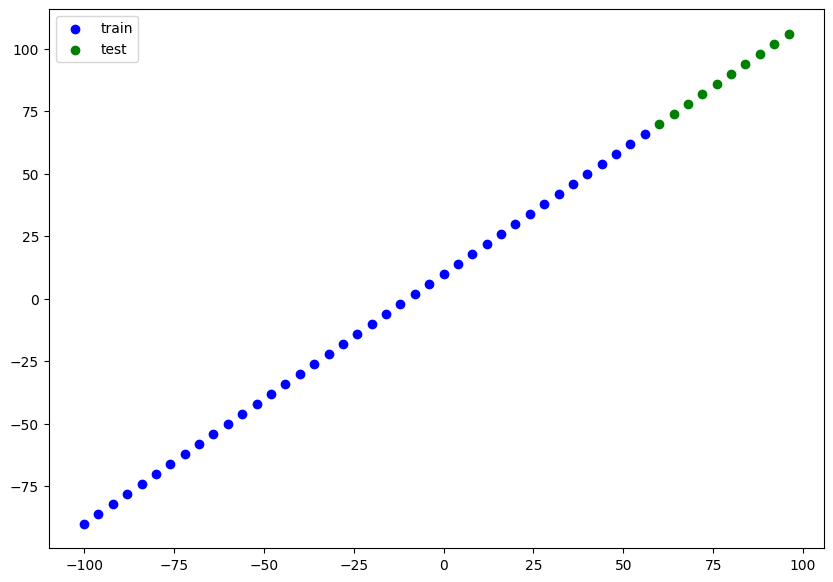

In [40]:
# visualize the data sets
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, color='blue', label='train')
plt.scatter(X_test, y_test, color='green', label='test')
plt.legend();

In [45]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 35.1318 - mae: 35.1318
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 23.4184 - mae: 23.4184
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 14.6682 - mae: 14.6682
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.7043 - mae: 9.7043
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 5.4042 - mae: 5.4042
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 4.9376 - mae: 4.9376
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 4.0060 - mae: 4.0060
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 6.0367 - mae: 6.0367
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1155 - mae: 7.1155
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6357 - mae: 11.6357
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss:

In [46]:
y_pred = model.predict(X_test)
y_test, y_pred

1/1 [==============================] - 0s 33ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[60.751293],
        [64.14331 ],
        [67.54348 ],
        [70.950424],
        [74.35859 ],
        [77.766945],
        [81.17565 ],
        [84.58364 ],
        [87.9941  ],
        [91.406166]], dtype=float32))

In [47]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               200       
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# define the input shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 36.5635 - mae: 36.5635
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 10.9023 - mae: 10.9023
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 14.7916 - mae: 14.7916
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8958 - mae: 10.8958
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 6.8494 - mae: 6.8494
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 15.6304 - mae: 15.6304
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8067 - mae: 10.8067
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6451 - mae: 10.6451
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0286 - mae: 8.0286
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 8.3899 - mae: 8.3899
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

In [69]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# visualize the mode
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [70]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[ 67.91362 ],
       [ 71.78503 ],
       [ 75.65645 ],
       [ 79.52786 ],
       [ 83.39927 ],
       [ 87.27068 ],
       [ 91.1421  ],
       [ 95.013504],
       [ 98.884926],
       [102.75634 ]], dtype=float32)

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [72]:
# build a reusable function to visual the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend();

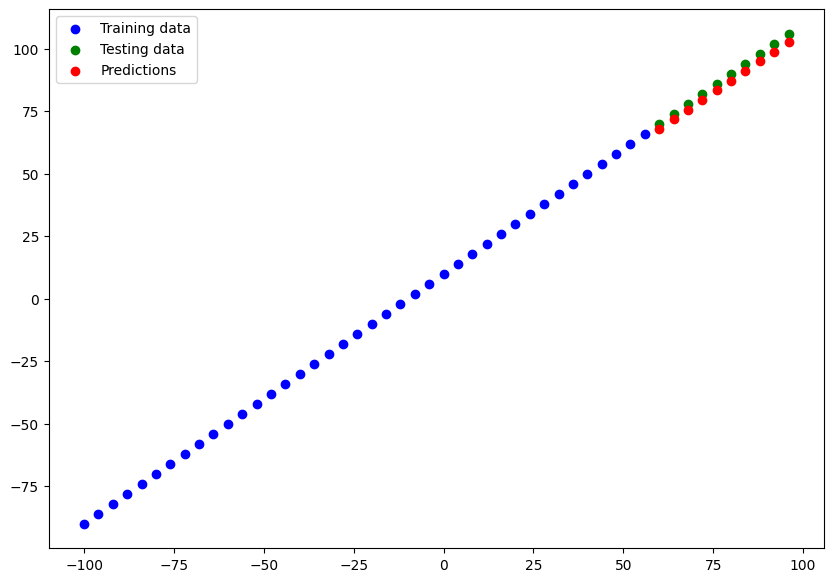

In [73]:
plot_predictions()

In [74]:
# evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 88ms/step - loss: 2.6650 - mae: 2.6650


[2.6650230884552, 2.6650230884552]

### 评价指标
* MAE平均绝对误差tf.keras.losses.MAE()
* MSE平均平方误差tf.keras.losses.MSE()突出更大的误差

In [79]:
# mae
# y_pred is not in the same shape
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.08638 , 16.57198 , 13.806131, 11.788855, 10.520146, 10.      ,
       10.228419, 11.205401, 12.930956, 15.405072], dtype=float32)>

In [80]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.91362 ,  71.78503 ,  75.65645 ,  79.52786 ,  83.39927 ,
        87.27068 ,  91.1421  ,  95.013504,  98.884926, 102.75634 ],
      dtype=float32)>

In [81]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6650224>

In [87]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=7.2387543>

In [88]:
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

### 模型实验
1. 更多数据
2. 更大模型
3. 更长时间
4. 机器学习就是不停实验

In [83]:
# check data
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [91]:
#### model 1

In [85]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.legacy.SGD(),
               metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7019 - mae: 13.7019
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 13.4569 - mae: 13.4569
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 12.2279 - mae: 12.2279
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3501 - mae: 9.3501
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2273 - mae: 10.2273
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4821 - mae: 9.4821
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.6131 - mae: 8.6131
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0434 - mae: 9.0434
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.8671 - mae: 18.8671
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1752 - mae: 10.1752
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 28ms/step


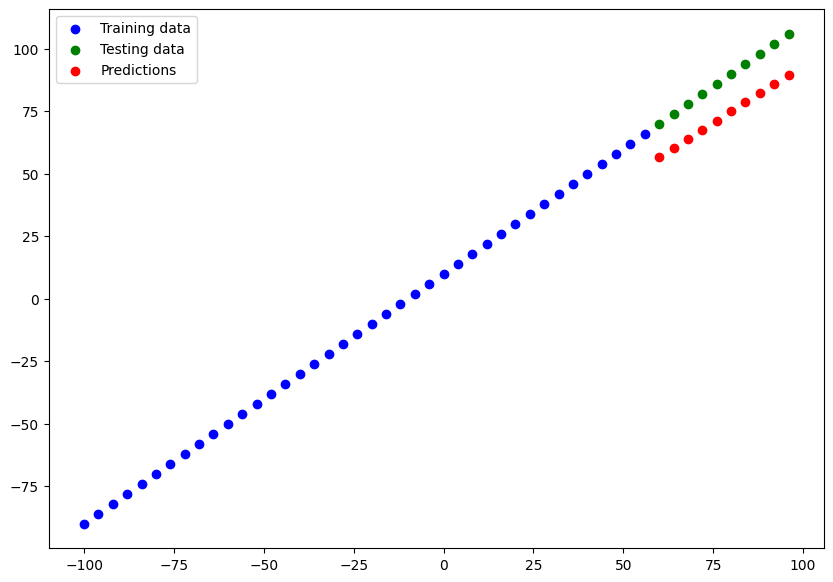

In [86]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [90]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.913524>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.25284>)

In [92]:
#### model 2

In [93]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.legacy.SGD(),
               metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 16.9350 - mae: 16.9350
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 21.5990 - mae: 21.5990
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 27.8741 - mae: 27.8741
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 26.7448 - mae: 26.7448
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.6237 - mae: 14.6237
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6400 - mae: 11.6400
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 10.9795 - mae: 10.9795
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0030 - mae: 11.0030
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 39.5277 - mae: 39.5277
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 27.0436 - mae: 27.0436
Epoch 11/100
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 34ms/step


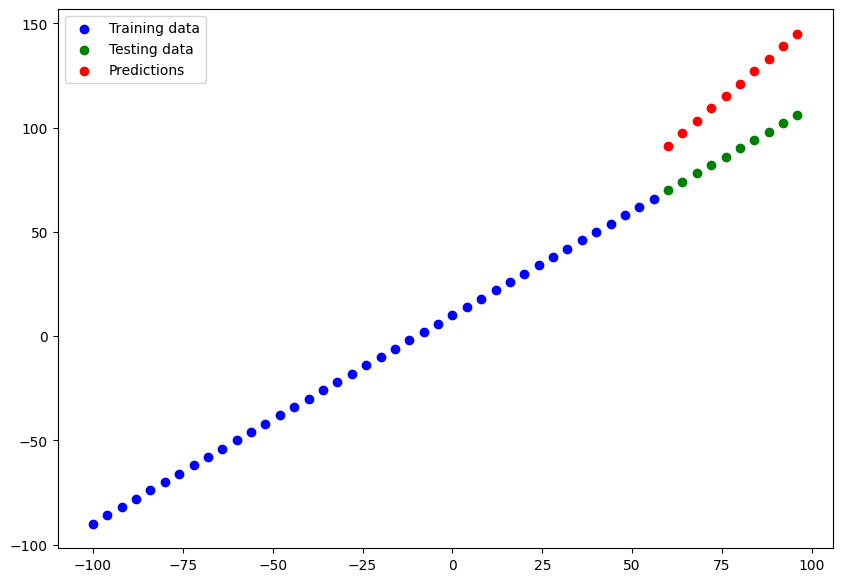

In [96]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [97]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=30.16537>,
 <tf.Tensor: shape=(), dtype=float32, numpy=941.75323>)

In [98]:
#### model 3

In [99]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.legacy.SGD(),
               metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 46.3070 - mae: 46.3070
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 30.4769 - mae: 30.4769
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 35.6393 - mae: 35.6393
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 26.9744 - mae: 26.9744
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 14.7528 - mae: 14.7528
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.7578 - mae: 11.7578
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 12.8394 - mae: 12.8394
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1026 - mae: 11.1026
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 40.4110 - mae: 40.4110
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 27.8114 - mae: 27.8114
Epoch 11/500
2/2 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 33ms/step


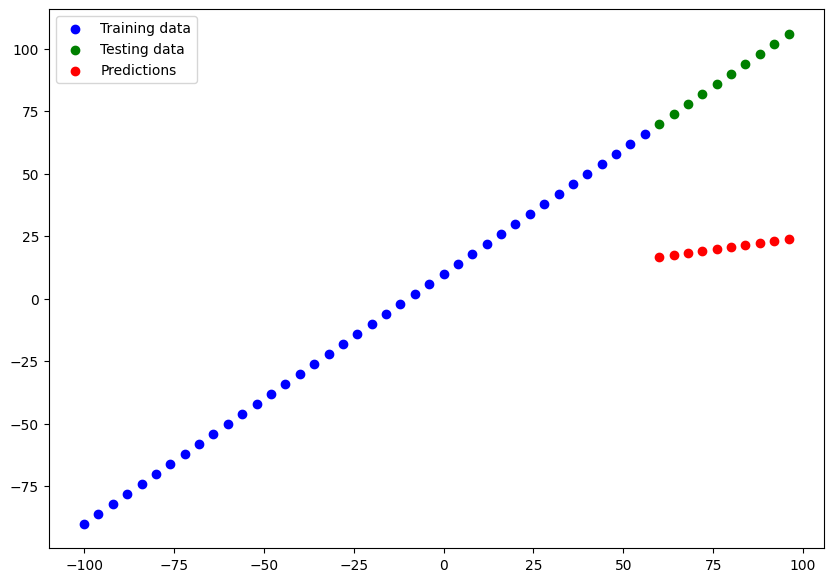

In [100]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [101]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.59163>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4652.6104>)

In [111]:
# comparing results
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
import pandas as pd
model_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
model_results

,model,mae,mse
0,model_1,14.913524,223.252838
1,model_2,30.165371,941.753235
2,model_3,67.591629,4652.610352


### 追踪实验结果
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

In [112]:
# save model
model_1.save('best_model_1.h5')

/Users/sallyw/machine-learning-lab/Tensorflow/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
model_1.save('best_model_1.keras')

In [114]:
# load model
loaded_model = tf.keras.models.load_model('best_model_1.h5')

In [115]:
model_1.predict(X_test) == loaded_model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [116]:
loaded_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
# Download the model (or any file) from Google Colab
# from google.colab import files
# files.download("best_model_HDF5_format.h5")

### 保险额预测案例

In [118]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [120]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [121]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [138]:
for c in insurance_one_hot.columns:
    if insurance_one_hot[c].dtype == bool:
        insurance_one_hot[c] = insurance_one_hot[c].astype(int)

In [139]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [140]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [141]:
# split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [151]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.legacy.SGD(),
                       metrics=["mae"])

insurance_model.fit(tf.constant(X_train), tf.constant(y_train), epochs=500)

Epoch 1/500
9/9 [==============================] - 0s 883us/step - loss: 11378.7227 - mae: 11378.7227
Epoch 2/500
9/9 [==============================] - 0s 709us/step - loss: 7710.2612 - mae: 7710.2612
Epoch 3/500
9/9 [==============================] - 0s 776us/step - loss: 7566.8125 - mae: 7566.8125
Epoch 4/500
9/9 [==============================] - 0s 675us/step - loss: 8036.3550 - mae: 8036.3550
Epoch 5/500
9/9 [==============================] - 0s 717us/step - loss: 8365.8740 - mae: 8365.8740
Epoch 6/500
9/9 [==============================] - 0s 628us/step - loss: 7578.0024 - mae: 7578.0024
Epoch 7/500
9/9 [==============================] - 0s 749us/step - loss: 7779.4585 - mae: 7779.4585
Epoch 8/500
9/9 [==============================] - 0s 692us/step - loss: 8031.1431 - mae: 8031.1431
Epoch 9/500
9/9 [==============================] - 0s 773us/step - loss: 7853.6704 - mae: 7853.6704
Epoch 10/500
9/9 [==============================] - 0s 630us/step - loss: 7378.7793 - mae: 7378.77

In [152]:
insurance_model.evaluate(tf.constant(X_test), tf.constant(y_test))

34/34 [==============================] - 0s 514us/step - loss: 6981.4600 - mae: 6981.4600


[6981.4599609375, 6981.4599609375]

In [153]:
y_train.median(), y_train.mean()

(8964.06055, 13111.11992988764)

In [154]:
# works very bad, try to improve it

In [159]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.legacy.Adam(), # SGD doesn't work
                       metrics=["mae"])

insurance_model_2.fit(tf.constant(X_train), tf.constant(y_train), epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 13089.2402 - mae: 13089.2402
Epoch 2/100
9/9 [==============================] - 0s 723us/step - loss: 13058.3906 - mae: 13058.3906
Epoch 3/100
9/9 [==============================] - 0s 891us/step - loss: 13024.6875 - mae: 13024.6875
Epoch 4/100
9/9 [==============================] - 0s 885us/step - loss: 12985.9473 - mae: 12985.9473
Epoch 5/100
9/9 [==============================] - 0s 758us/step - loss: 12939.7109 - mae: 12939.7109
Epoch 6/100
9/9 [==============================] - 0s 864us/step - loss: 12883.2402 - mae: 12883.2402
Epoch 7/100
9/9 [==============================] - 0s 774us/step - loss: 12814.2588 - mae: 12814.2588
Epoch 8/100
9/9 [==============================] - 0s 944us/step - loss: 12728.7412 - mae: 12728.7412
Epoch 9/100
9/9 [==============================] - 0s 726us/step - loss: 12625.0283 - mae: 12625.0283
Epoch 10/100
9/9 [==============================] - 0s 842us/step - loss: 12499.4746

In [164]:
insurance_model_2.evaluate(tf.constant(X_test), tf.constant(y_test))

34/34 [==============================] - 0s 539us/step - loss: 6925.6284 - mae: 6925.6284


[6925.62841796875, 6925.62841796875]

In [167]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.legacy.Adam(), # SGD doesn't work
                       metrics=["mae"])

history = insurance_model_3.fit(tf.constant(X_train), tf.constant(y_train), epochs=500)
# train longer

Epoch 1/500
9/9 [==============================] - 0s 1ms/step - loss: 13106.5869 - mae: 13106.5869
Epoch 2/500
9/9 [==============================] - 0s 833us/step - loss: 13080.3916 - mae: 13080.3916
Epoch 3/500
9/9 [==============================] - 0s 1ms/step - loss: 13052.2871 - mae: 13052.2871
Epoch 4/500
9/9 [==============================] - 0s 1ms/step - loss: 13020.5010 - mae: 13020.5010
Epoch 5/500
9/9 [==============================] - 0s 915us/step - loss: 12982.9678 - mae: 12982.9678
Epoch 6/500
9/9 [==============================] - 0s 853us/step - loss: 12937.3418 - mae: 12937.3418
Epoch 7/500
9/9 [==============================] - 0s 821us/step - loss: 12881.5605 - mae: 12881.5605
Epoch 8/500
9/9 [==============================] - 0s 751us/step - loss: 12812.0674 - mae: 12812.0674
Epoch 9/500
9/9 [==============================] - 0s 819us/step - loss: 12727.1709 - mae: 12727.1709
Epoch 10/500
9/9 [==============================] - 0s 740us/step - loss: 12623.5166 - m

In [166]:
insurance_model_3.evaluate(tf.constant(X_test), tf.constant(y_test))

34/34 [==============================] - 0s 514us/step - loss: 3752.4771 - mae: 3752.4771


[3752.47705078125, 3752.47705078125]

Text(0.5, 0, 'epochs')

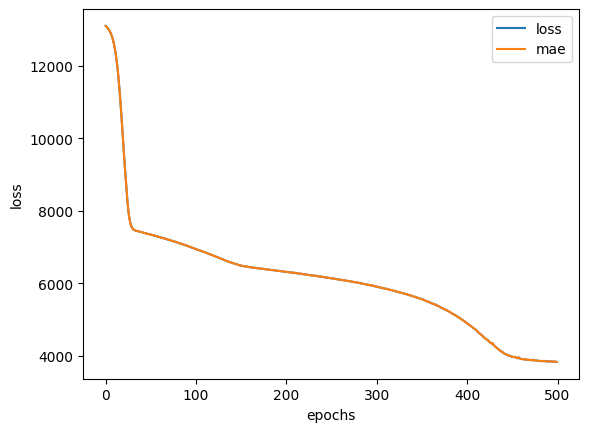

In [168]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

将模型history化，可以显示模型在优化过程中的参数

### 数据缩放：标准化和正规化
* 标准化（Standardization）：
操作： 标准化是通过减去均值（mean）然后除以标准差（standard deviation）的操作，使得数据的分布具有零均值和单位方差。
效果： 标准化后的数据分布在接近正态分布的范围内，使得不同特征的尺度一致，有助于某些模型的收敛速度和模型的性能。
* 归一化（Normalization）：
操作： 归一化是通过线性变换将数据缩放到一个指定的范围，通常是0,1或者-1,1。
效果： 归一化后的数据被映射到一个特定的范围，有助于避免某些模型受到特征尺度的影响，对于那些依赖距离度量的算法（如 K-Means、K-Nearest Neighbors）特别有用。

In [169]:
# sklearn标准化
from sklearn.preprocessing import StandardScaler
import numpy as np

# 创建一个示例数据集
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 对数据进行标准化
standardized_data = scaler.fit_transform(data)

# 显示标准化后的数据
print("Standardized Data:")
print(standardized_data)

# sklearn归一化
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 创建一个示例数据集
data = np.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 对数据进行归一化
normalized_data = scaler.fit_transform(data)

# 显示归一化后的数据
print("Normalized Data:")
print(normalized_data)

Standardized Data:
[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Normalized Data:
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


In [171]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [172]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the transformer
ct.fit(X_train)

# transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [174]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [178]:
# model
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.Adam(),
    metrics=['mae']
)

history = insurance_model_4.fit(tf.constant(X_train_normal), tf.constant(y_train), epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 729us/step - loss: 13343.3662 - mae: 13343.3662
Epoch 2/500
34/34 [==============================] - 0s 566us/step - loss: 13334.5078 - mae: 13334.5078
Epoch 3/500
34/34 [==============================] - 0s 572us/step - loss: 13312.5605 - mae: 13312.5605
Epoch 4/500
34/34 [==============================] - 0s 619us/step - loss: 13266.4629 - mae: 13266.4629
Epoch 5/500
34/34 [==============================] - 0s 589us/step - loss: 13185.1572 - mae: 13185.1572
Epoch 6/500
34/34 [==============================] - 0s 588us/step - loss: 13057.7139 - mae: 13057.7139
Epoch 7/500
34/34 [==============================] - 0s 586us/step - loss: 12873.8340 - mae: 12873.8340
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12623.4521 - mae: 12623.4521
Epoch 9/500
34/34 [==============================] - 0s 577us/step - loss: 12296.4395 - mae: 12296.4395
Epoch 10/500
34/34 [==============================] - 0s 597us/ste

In [180]:
insurance_model_4.evaluate(tf.constant(X_test_normal), tf.constant(y_test))

9/9 [==============================] - 0s 781us/step - loss: 3161.0610 - mae: 3161.0610


[3161.06103515625, 3161.06103515625]